# 피마 인디언 당뇨병 데이터

- 데이터 활용 목적 : 당뇨병 여부를 판단하는 머신러닝 예측 모델을 개발
- 데이터 개요
    - 북아메리카 피마 지역 원주민의 Type-2 당뇨병 결과 데이터
    - 일반적으로 알려진 당뇨병의 원인은 식습관과 유전
        - 피마 지역은 고립된 지역에서 인디언 고유의 혈통이 지속됨
        - 20세기 후반 서구화된 식습관으로 많은 당뇨 환자가 발생
        
    - 피처
        - Pregnancies : 임신 횟수
        - Glucose : 포도당 부하 검사 수치
        - BloodPressure : 혈압(mm Hg)
        - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
        - Insulin : 혈청 인슐린(mm U/ml)
        - BMI : 체질량 지수(체중(kg) / 키(m))^2
        - DiabetesPedigreeFuction : 당뇨 내력 가중치 값
        - Age : 나이
        - Outcome : 클래스 결정 값(0 또는 1)

In [382]:
import pandas as pd

In [383]:
df = pd.read_csv("./data/diabetes.csv")

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [385]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [386]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [387]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [388]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import roc_auc_score, precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score

In [389]:
ss = StandardScaler()
rs = RobustScaler()
scaled_x = ss.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = x.columns)

In [390]:
new_x = sm.add_constant(scaled_x)
model = sm.Logit(y, new_x)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.2718
Time:                        14:53:47   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8711      0.097     -8.986      0.000      -1.061      -0.681
Pregnancies                  0.4148      0.108      3.840      0.000       0.203       0.627
Glucose                      1.1235      0.118      9.481      0.000       0.891       1.356
BloodPressure               -0.2572      0.101     -2.540      0.011      -0.456      -0.059
SkinThickness                0.0099      0.110      0.090      0.929      -0.206       0.225
Insulin                     -0.1372      0.104     -1.322      0.186      -0.341       0.066
BMI                          0.7068      0.119      5.945      0.000       0.474       0.940
DiabetesPedigreeFunction     0.3130      0.099      3.160      0.002       0.119       0.507
Age                          0.1747      0.110      1.593      0.111      -0.040       0.390
============================================================================================
"""

In [391]:
new_x = sm.add_constant(scaled_x.drop(["SkinThickness", "Insulin", "Age"], axis = 1))
model = sm.Logit(y, new_x)
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.474323
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      762
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.2667
Time:                        14:53:48   Log-Likelihood:                -364.28
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 3.442e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8609      0.096     -8.968      0.000      -1.049      -0.673
Pregnancies                  0.5169      0.094      5.514      0.000       0.333       0.701
Glucose                      1.1074      0.108     10.213      0.000       0.895       1.320
BloodPressure               -0.2323      0.097     -2.387      0.017      -0.423      -0.042
BMI                          0.6684      0.111      6.006      0.000       0.450       0.887
DiabetesPedigreeFunction     0.3015      0.097      3.097      0.002       0.111       0.492
============================================================================================
"""

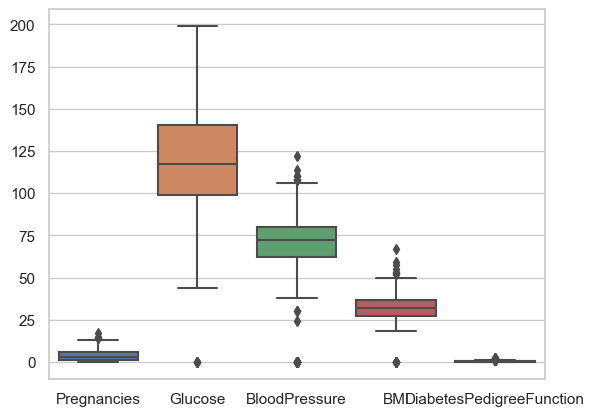

In [392]:
plt.figure()
sns.boxplot(x.drop(["SkinThickness", "Age","Insulin"], axis = 1))
plt.show()

In [393]:
use_x = df.drop(["SkinThickness", "Age","Insulin", "Outcome"], axis = 1)

In [394]:
use_x

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction
0,6,148,72,33.6,0.627
1,1,85,66,26.6,0.351
2,8,183,64,23.3,0.672
3,1,89,66,28.1,0.167
4,0,137,40,43.1,2.288
...,...,...,...,...,...
763,10,101,76,32.9,0.171
764,2,122,70,36.8,0.340
765,5,121,72,26.2,0.245
766,1,126,60,30.1,0.349


In [395]:
use_df = df.drop(["SkinThickness", "Age"], axis = 1)
use_df = use_df[use_df["Glucose"] > 25]
x = use_df.drop("Outcome", axis = 1)
y = use_df["Outcome"]

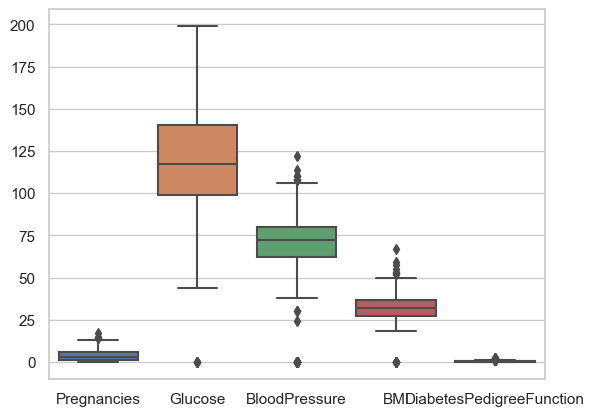

In [396]:
plt.figure()
sns.boxplot(use_x)
plt.show()

In [397]:
scaled_x = ss.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x, columns = x.columns)
new_x = sm.add_constant(scaled_x)
model = sm.Logit(y.reset_index(drop = True), new_x.reset_index(drop = True))
model = model.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.464123
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  763
Model:                          Logit   Df Residuals:                      756
Method:                           MLE   Df Model:                            6
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.2822
Time:                        14:53:48   Log-Likelihood:                -354.13
converged:                       True   LL-Null:                       -493.35
Covariance Type:            nonrobust   LLR p-value:                 3.380e-57
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8588      0.097     -8.828      0.000      -1.049      -0.668
Pregnancies                  0.4946      0.096      5.165      0.000       0.307       0.682
Glucose                      1.2069      0.114     10.560      0.000       0.983       1.431
BloodPressure               -0.2398      0.100     -2.409      0.016      -0.435      -0.045
Insulin                     -0.1620      0.094     -1.718      0.086      -0.347       0.023
BMI                          0.6730      0.114      5.899      0.000       0.449       0.897
DiabetesPedigreeFunction     0.3221      0.100      3.216      0.001       0.126       0.518
============================================================================================
"""

In [398]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(new_x.values, i) for i in range(new_x.shape[1])]
vif["feature"] = new_x.columns
vif.round(1)

,VIF_Factor,feature
0,1.0,const
1,1.1,Pregnancies
2,1.2,Glucose
3,1.1,BloodPressure
4,1.2,Insulin
5,1.2,BMI
6,1.1,DiabetesPedigreeFunction


In [400]:
# 평가지표 출력하는 함수 _ StandardScale
def get_clf_eval_ss(y_test, pred = None, pred_proba = None):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('roc_auc: {:.4f}'.format(roc_auc))

In [401]:
x = df[['Pregnancies', 'Glucose', 'BMI', "BloodPressure", 'DiabetesPedigreeFunction']]
y = df["Outcome"]
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.3, random_state = 0)

In [402]:
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [403]:
logi = LogisticRegression()
logi.fit(scaled_train, y_train)

LogisticRegression()

In [404]:
scores = cross_validate(logi, scaled_train, y_train, scoring = "roc_auc", return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]), np.mean(scores["train_score"]))
print(logi.score(scaled_test, y_test))

[0.8481203  0.78609023 0.81930502 0.81389961 0.77374517]
0.8082320666531194 0.8189808245445829
0.7792207792207793


In [405]:
pred = logi.predict(scaled_test)
pred_proba = logi.predict_proba(scaled_test)[:,1]
get_clf_eval_ss(y_test, pred, pred_proba)

정확도: 0.7792
정밀도: 0.7419
재현율: 0.5679
F1: 0.6434
roc_auc: 0.8760


In [406]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BMI', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object')

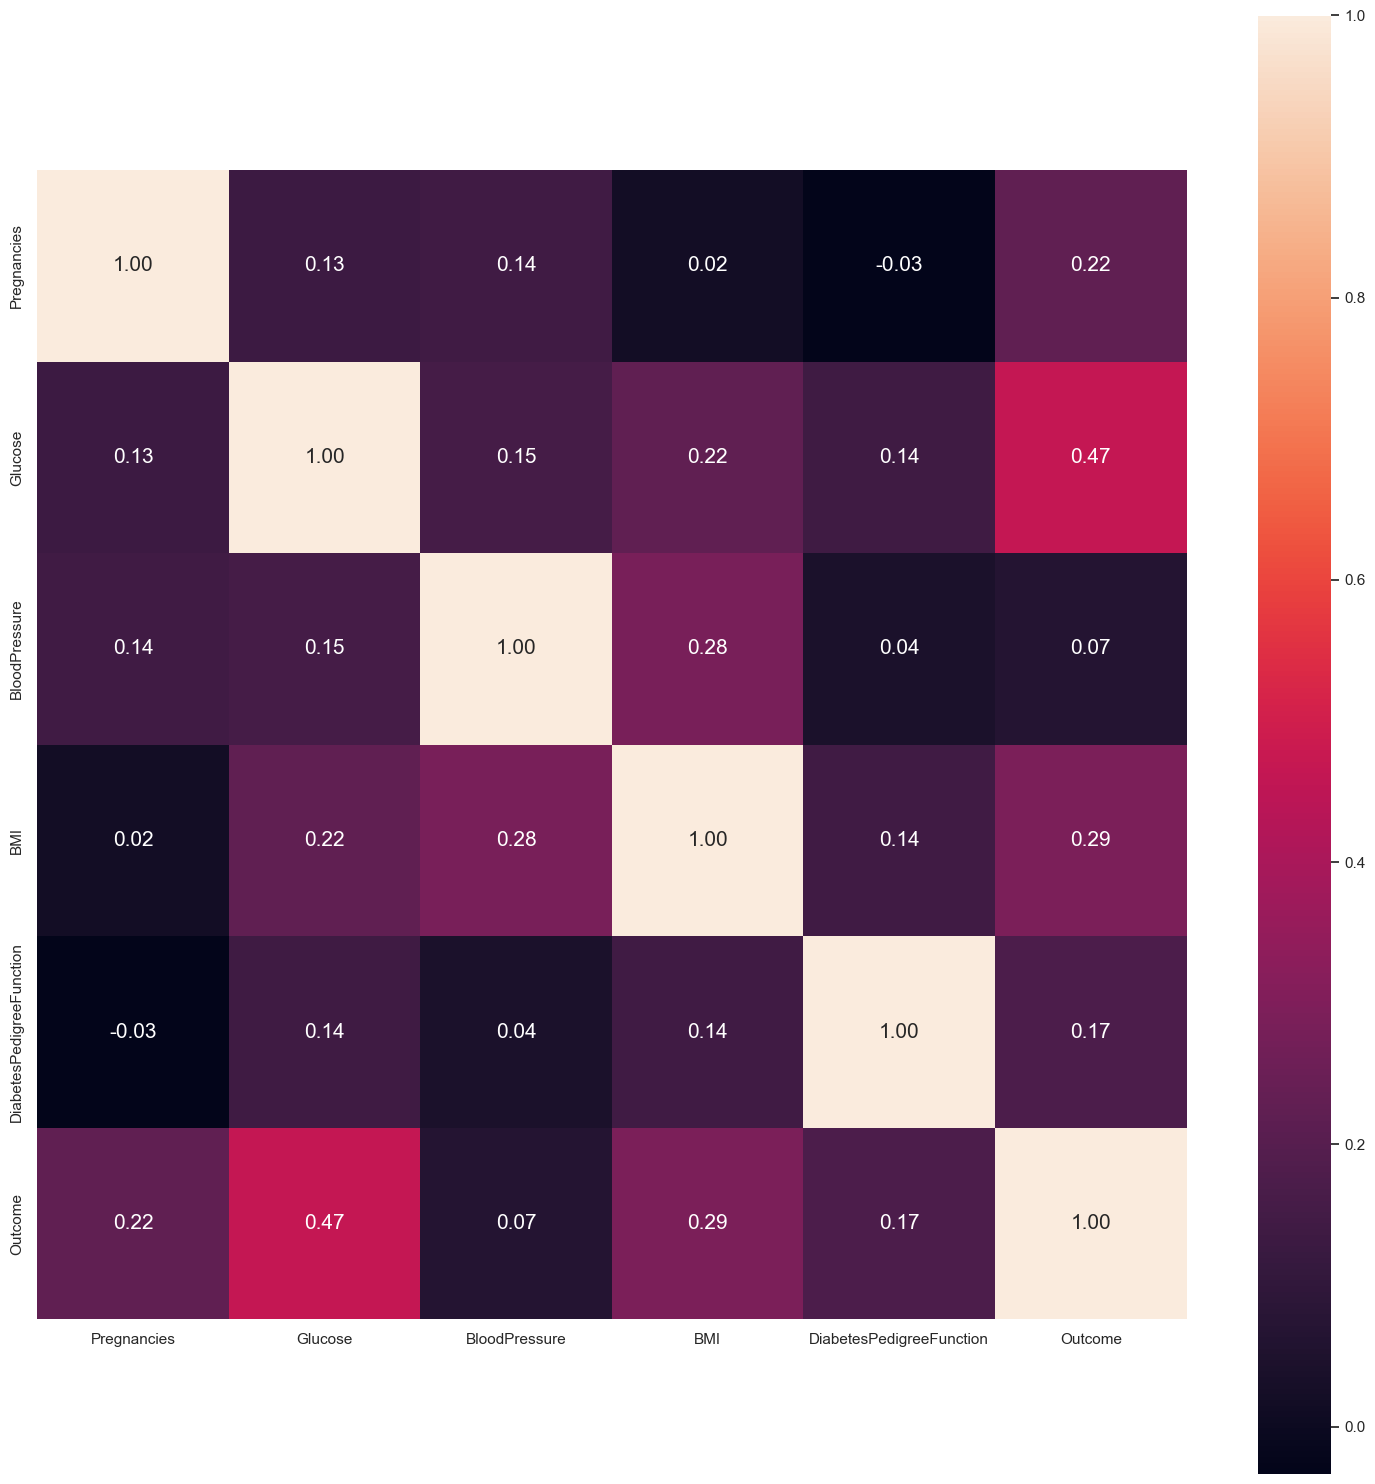

In [407]:
plt.figure(figsize = (15, 15))
corr = df[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', "Outcome"]].corr()
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = ".2f", annot_kws = {"size" : 15},
                yticklabels = df[["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Outcome"]].columns, xticklabels = df[["Pregnancies", "Glucose", "BloodPressure", "BMI", "DiabetesPedigreeFunction", "Outcome"]].columns)

plt.tight_layout()
plt.show()

In [408]:
import matplotlib.ticker as ticker
 
def precision_recall_curve_plot(y_test , pred_proba):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [ ]:
precision_recall_curve_plot(y_test, pred_proba)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
et = ExtraTreesClassifier(n_jobs = -1, random_state = 0)
gb = GradientBoostingClassifier(random_state = 0)

In [ ]:
rf.fit(x_train, y_train)
scores = cross_validate(rf, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))
pred = rf.predict(x_test)
pred_proba = rf.predict_proba(x_test)[:,1]

get_clf_eval_ss(y_test, pred, pred_proba)

In [ ]:
et.fit(x_train, y_train)
scores = cross_validate(et, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))
pred = et.predict(x_test)
pred_proba = et.predict_proba(x_test)[:,1]

get_clf_eval_ss(y_test, pred, pred_proba)

In [ ]:
gb.fit(x_train, y_train)
scores = cross_validate(gb, x_train, y_train, return_train_score = True, n_jobs = -1)
print(scores["test_score"])
print(np.mean(scores["test_score"]))
pred = gb.predict(x_test)
pred_proba = gb.predict_proba(x_test)[:,1]

get_clf_eval_ss(y_test, pred, pred_proba)

In [ ]:
from sklearn.preprocessing import Binarizer